In [57]:
import pandas as pd
from pathlib import Path
import unicodedata
import ast
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords

In [19]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
scraped_df = pd.read_csv("data/scraped.csv", comment="#")

In [9]:
def fix_content(x):
    
    if type(x) != type(np.nan):
      
        arr = []
        for i in ast.literal_eval(x):
            arr.append(unicodedata.normalize("NFKD", i).strip())
        return " ".join(np.asarray(arr).flatten().tolist())
scraped_df["fixed_content"] = scraped_df["main_content"].transform(fix_content)

In [10]:
scraped_df = scraped_df.dropna(subset=["fixed_content"])

In [20]:
scraped_df["sent_tokens"] = scraped_df["fixed_content"].transform(lambda x : sent_tokenize(x))

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
scraped_df["sent_tokens"][0][0]

'MAHITAHI HAUORA  We are looking for an experienced Information Systems Facilitator who is comfortable in supporting internal and external customers across a range of platforms and programs and who has a flare for identifying and implementing improvement initiatives in IT functionality and systems that will enable enhanced quality, productivity, simplicity and efficiency for our users.'

In [82]:
sent_corp = [
]

stop_words = set(stopwords.words("english"))

for i in scraped_df["sent_tokens"].values:
    for sentence in i:
        
        sent = word_tokenize(sentence)
        sent_clean = []
        for word in sent:
            if word.isalpha() and word not in stop_words:
                sent_clean.append(word.lower())
       # word.lower() for word in sent if word.isalpha() and word not in stop_words
        sent_corp.append(sent_clean)
    

In [88]:
sent = ["sloth", "we", "an", "the","it", "i"]
for word in sent:
    print(word not in stop_words)

True
False
False
False
False
False


In [78]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [83]:
sent_corp

[['mahitahi',
  'hauora',
  'we',
  'looking',
  'experienced',
  'information',
  'systems',
  'facilitator',
  'comfortable',
  'supporting',
  'internal',
  'external',
  'customers',
  'across',
  'range',
  'platforms',
  'programs',
  'flare',
  'identifying',
  'implementing',
  'improvement',
  'initiatives',
  'it',
  'functionality',
  'systems',
  'enable',
  'enhanced',
  'quality',
  'productivity',
  'simplicity',
  'efficiency',
  'users'],
 ['about',
  'mahitahi',
  'hauora',
  'mahitahi',
  'hauora',
  'primary',
  'health',
  'entity',
  'te',
  'tai',
  'tokerau'],
 ['it',
  'charitable',
  'social',
  'enterprise',
  'vision',
  'everyone',
  'tai',
  'tokerau',
  'equitable',
  'opportunity',
  'receive',
  'care',
  'wellbeing',
  'support',
  'need',
  'way',
  'works',
  'centre',
  'decisions',
  'care',
  'wellbeing'],
 ['mahitahi',
  'hauora',
  'supports',
  'primary',
  'healthcare',
  'providers',
  'including',
  'general',
  'practices',
  'health',
  'p

In [ ]:
def clean_corp(corp):
    for i in corp

In [33]:
len(sent)

49532

In [89]:
model = Word2Vec(sent_corp, min_count=5,size=100,workers=12, window =5, sg = 1)

In [90]:
model.wv.vocab.keys()

dict_keys(['hauora', 'we', 'looking', 'experienced', 'information', 'systems', 'facilitator', 'comfortable', 'supporting', 'internal', 'external', 'customers', 'across', 'range', 'platforms', 'programs', 'flare', 'identifying', 'implementing', 'improvement', 'initiatives', 'it', 'functionality', 'enable', 'enhanced', 'quality', 'productivity', 'simplicity', 'efficiency', 'users', 'about', 'primary', 'health', 'entity', 'te', 'charitable', 'social', 'enterprise', 'vision', 'everyone', 'equitable', 'opportunity', 'receive', 'care', 'wellbeing', 'support', 'need', 'way', 'works', 'centre', 'decisions', 'supports', 'healthcare', 'providers', 'including', 'general', 'practices', 'deliver', 'look', 'communities', 'also', 'directly', 'community', 'the', 'position', 'delivering', 'effective', 'timely', 'system', 'user', 'providing', 'realistic', 'solutions', 'improvements', 'working', 'collaboratively', 'ensure', 'organisational', 'daily', 'basis', 'infrastructure', 'planning', 'building', 'ma

In [91]:
model["workplace"]

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.5341224 ,  0.49985832, -0.03571999, -0.20064446,  0.82368416,
        0.04411618, -0.31210986, -0.27457878, -0.4179791 , -0.2077065 ,
        0.4189295 ,  0.21620058, -0.12934338,  0.5758715 ,  0.2749631 ,
       -0.01766788, -0.7370485 , -0.6651483 ,  1.298259  ,  0.13757567,
        0.09779014,  0.49045652, -0.53968096,  0.08905211, -0.7874192 ,
       -0.22727613,  1.1210877 ,  0.39147523,  0.21361709, -0.4713037 ,
        0.26674944,  0.15029971, -0.23824917, -0.488133  ,  0.34278893,
       -0.3883541 , -0.7664061 , -0.09204368,  0.22024263,  0.28353876,
       -0.33915257, -0.2621415 , -0.16756687, -0.39368382, -0.2755056 ,
        0.41567877, -0.493251  , -0.09567542,  0.10107552, -0.20832585,
       -0.80403596,  0.4200767 ,  0.33089736,  0.50307304,  0.53410226,
       -0.2967939 ,  0.21965556,  0.00417999, -0.28654703, -0.07957685,
       -0.1798094 ,  0.01959642, -0.65810615, -0.37191343, -0.00663324,
       -0.37756404, -0.22619514, -0.35486537, -0.17721513,  0.21

In [92]:
model["employer"]

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.3489579 ,  0.36741716, -0.57234263, -0.8606643 , -0.02431424,
        0.9730563 ,  0.4283585 , -0.7923173 , -0.7245571 , -0.20828861,
       -0.02349497,  0.59793293, -0.0889912 ,  0.24834391,  0.44033748,
       -0.6360616 , -0.7347951 , -0.03486869,  0.7813875 ,  0.48382607,
        0.37947425, -0.309462  , -0.03882295,  0.01102592, -0.6437603 ,
        0.09806914,  1.0577258 ,  0.2883945 ,  0.917613  , -0.6357573 ,
        0.4003202 , -0.20799018, -0.0149365 , -0.22947924, -0.01964587,
       -0.25451562,  0.02769925,  0.22975047,  0.07100943,  0.25698978,
        0.14620839, -0.76740694, -0.410307  , -0.06821334,  0.31340113,
       -0.05940638, -0.2038397 ,  0.6629922 ,  0.16225809, -1.0090678 ,
        0.05400539, -0.16034618, -0.01172217,  0.16199237, -0.31552958,
        0.09354289,  0.29183677,  0.4814791 ,  0.24764746, -0.23019992,
        0.10823817, -0.09123109, -1.2394596 ,  0.58377826,  0.27199325,
       -0.32769793,  0.5938212 , -0.1503138 , -0.45117393,  0.71

In [115]:
import sklearn
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [98]:
np.dot(model["employer"], model["workplace"])

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


7.6716557

In [99]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [107]:
cosine_similarity(model["python"].reshape(1,-1), model["sql"].reshape(1,-1))

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[0.68861735]], dtype=float32)

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


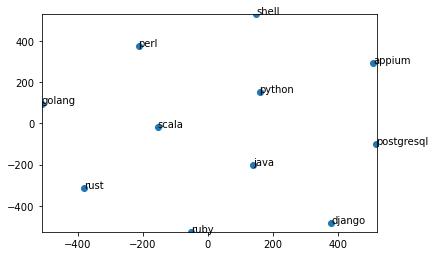

In [124]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model, 'python', 100) 

In [126]:
model["web developer"]

C:\Users\sloth\anaconda3\envs\scraper\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'web developer' not in vocabulary"

In [128]:
model.save("models/word2vec_sg.model")